# Handwritten Number Recognition using Deep Learning

### By : Shivam Chaudhary

In [44]:
# import libraries

from keras.layers import Dense,Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils
import keras
import pydotplus
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# load mnist dataset

(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [3]:
# shape check

dataset = [('x_train',x_train), ('y_train',y_train),('x_test',x_test),('y_test',y_test)]

for name, shape in dataset:
    print(f'{name} shape : {shape.shape}')

x_train shape : (60000, 28, 28)
y_train shape : (60000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)


Here, the training data consists of a set of images containing handwritten numbers, and the test data contains their corresponding values

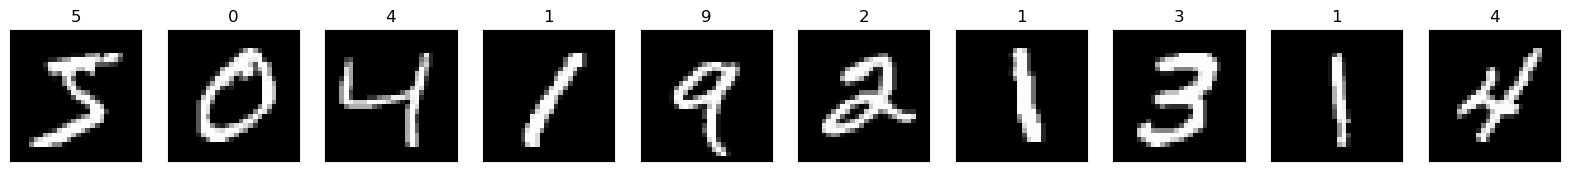

In [4]:
# check images in dataset

fig, axis = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20,10))

for i in range(10):
    axis[i].set_title(y_train[i])
    axis[i].imshow(x_train[i], cmap='gray')
    axis[i].get_xaxis().set_visible(False)
    axis[i].get_yaxis().set_visible(False)
plt.show()    

In [5]:
# conver labels to categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(f'Now, the output will look like : {y_train[0]}')
print(f'And  Shape of y_train : {y_train.shape} \n     Shape of y_test : {y_test.shape}')

Now, the output will look like : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
And  Shape of y_train : (60000, 10) 
     Shape of y_test : (10000, 10)


In [6]:
# model preparation

model = Sequential()                        # In a sequential model all layers are arranged sequentially, one after another.
model.add(Flatten(input_shape=(28,28)))     # Flattening flattens the dimensions, so if an array is [1, 2, 3
                                            #                                                        4, 5, 6
                                            #                                                        7, 8, 9],  
                                            # it becomes [1, 2, 3, 4, 5, 6, 7, 8, 9].
model.add(Dense(10, activation='sigmoid'))  # This layer has 10 neurons with sigmoid activation function.
model.add(Dense(5, activation='sigmoid'))   # This layer has 5 neurons with sigmoid activation function.
model.add(Dense(10, activation='softmax'))  # Final layer with 10 neurons and softmax activation function.

In [7]:
# model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7965 (31.11 KB)
Trainable params: 7965 (31.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# compile the model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

Now we have defined the architecture of the model, compiled the model, and now we will train the model.

In [11]:
# train model

history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7815 - acc: 0.4195 - val_loss: 1.4030 - val_acc: 0.5620
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2305 - acc: 0.6107 - val_loss: 1.0988 - val_acc: 0.6398
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0369 - acc: 0.6610 - val_loss: 0.9530 - val_acc: 0.7214
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9101 - acc: 0.7041 - val_loss: 0.8542 - val_acc: 0.6962
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8538 - acc: 0.7176 - val_loss: 0.8281 - val_acc: 0.7350
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7948 - acc: 0.7513 - val_loss: 0.7327 - val_acc: 0.7740
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7587 - acc: 0.7609 - val_loss: 0.7145 - val_acc: 0.7898
Epoch 8/20
1875/1875 [==============================] - 5s 2ms

In [16]:
# save model

model.save('mnist_model.h5')

In [17]:
# model history

history.history

{'loss': [1.7814806699752808,
  1.2304965257644653,
  1.036900520324707,
  0.9100930094718933,
  0.8538013100624084,
  0.794834554195404,
  0.758669376373291,
  0.7462491393089294,
  0.7090525031089783,
  0.7194146513938904,
  0.7081533670425415,
  0.6702724099159241,
  0.6760357022285461,
  0.6742721199989319,
  0.6539584994316101,
  0.6331667900085449,
  0.6173763871192932,
  0.6193049550056458,
  0.5922729969024658,
  0.5944661498069763],
 'acc': [0.4194999933242798,
  0.6106500029563904,
  0.6610000133514404,
  0.7041000127792358,
  0.7176499962806702,
  0.7512500286102295,
  0.7609333395957947,
  0.7630166411399841,
  0.7788166403770447,
  0.7809666395187378,
  0.7892333269119263,
  0.8014833331108093,
  0.8010166883468628,
  0.7947666645050049,
  0.8170833587646484,
  0.8281333446502686,
  0.8401666879653931,
  0.8346499800682068,
  0.8463500142097473,
  0.8366333246231079],
 'val_loss': [1.4030143022537231,
  1.098753571510315,
  0.9529666304588318,
  0.8541606664657593,
  0.828

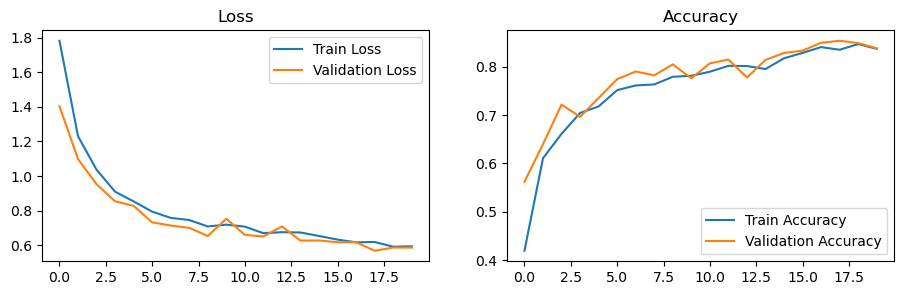

In [33]:
# let's see losses and accuracy graphically

plt.figure(figsize=(11, 3))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()


These graphs are close to each other, the model is neither underperforming nor overperforming (underfitting or overfitting).

In [36]:
# load model and check accuracy

model = keras.models.load_model('mnist_model.h5')

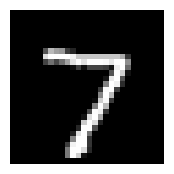

Image Dimension/Shape : (28, 28)


In [43]:
# image to predict

plt.figure(figsize=(2, 2))
plt.imshow(x_test[0], cmap='gray') 
plt.axis('off')
plt.show()
print(f'Image Dimension/Shape : {x_test[0].shape}')

In [47]:
# let's predict this image with model

x = np.reshape(x_test[0], (1, 28, 28))
predicted_number = np.argmax(model.predict(x))
print(f'The given image has the number "{predicted_number}" on it.')

1/1 [==============================] - 0s 30ms/step
The given image has the number "7" on it.


                                                         Thanks